# Dynamic Programming

### Contents

 * Policy Evaluation (Prediction)

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import rcParams

sns.set()

# Policy Evaluation

Policy evaluation is is process of comupting the state-value function $v_{\pi}$ for an arbitrary policy $\pi$

## Iteractive Policy evaluation

In the following example we use 4x4 grid, where top-left and bottom-right corner have value 0 and are terminal states. 

The agent can move in NSEW directions and each move gives -1 reward.
Lets calculate optimal value function for given policy in interactive manner.

The algorithm can use 2 array to compute next iteration, but it can also work with single array in place updates. The end result is the same.

Our agent uses equiprobable random policy (every action is equally probable).

The update rule:
$$ V(s) = \sum_a{\pi(a|s) \sum_{s',r}{p(s',r|s,a)[r+\gamma V(s')]}}$$

Here $\gamma = 1$

In [2]:
def update(grid):
    out = np.zeros((4,4))
    for i in range(4):
        for j in range(4):
            if i == j and (i == 0 or i == 3):
                out[i,j] = 0
            else:
                l = grid[i,j] if i == 0 else grid[i-1,j]
                r = grid[i,j] if i == 3 else grid[i+1,j]
                t = grid[i,j] if j == 0 else grid[i,j-1]
                b = grid[i,j] if j == 3 else grid[i,j+1]
                out[i,j] = (l+r+t+b)/4 - 1
    return out

grid = np.zeros((4,4))
print('k=0')
print(grid)

for k in range(100):
    grid = update(grid)
    if k in [0,1,2,9,99]:
        print('k=%d' % (k+1))
        print(grid)        

k=0
[[ 0.  0.  0.  0.]
 [ 0.  0.  0.  0.]
 [ 0.  0.  0.  0.]
 [ 0.  0.  0.  0.]]
k=1
[[ 0. -1. -1. -1.]
 [-1. -1. -1. -1.]
 [-1. -1. -1. -1.]
 [-1. -1. -1.  0.]]
k=2
[[ 0.   -1.75 -2.   -2.  ]
 [-1.75 -2.   -2.   -2.  ]
 [-2.   -2.   -2.   -1.75]
 [-2.   -2.   -1.75  0.  ]]
k=3
[[ 0.     -2.4375 -2.9375 -3.    ]
 [-2.4375 -2.875  -3.     -2.9375]
 [-2.9375 -3.     -2.875  -2.4375]
 [-3.     -2.9375 -2.4375  0.    ]]
k=10
[[ 0.         -6.13796997 -8.35235596 -8.96731567]
 [-6.13796997 -7.73739624 -8.42782593 -8.35235596]
 [-8.35235596 -8.42782593 -7.73739624 -6.13796997]
 [-8.96731567 -8.35235596 -6.13796997  0.        ]]
k=100
[[  0.         -13.94260509 -19.91495107 -21.90482522]
 [-13.94260509 -17.92507693 -19.91551999 -19.91495107]
 [-19.91495107 -19.91551999 -17.92507693 -13.94260509]
 [-21.90482522 -19.91495107 -13.94260509   0.        ]]


Optimal policy:
<img src="../assets/policy1.png">

# Policy improvement

The process of using greedy policy over original policy is called _policy improvement_

# Policy Iteraction

When we switch to greedy policy in given state, we improve our policy.
We can then take this new policy and calculate new value function.
Then we switch to new greedy policy based on this new value functionn.

This way we will find the _optimal policy_.

## Example 4.5 Jack's Car Rental

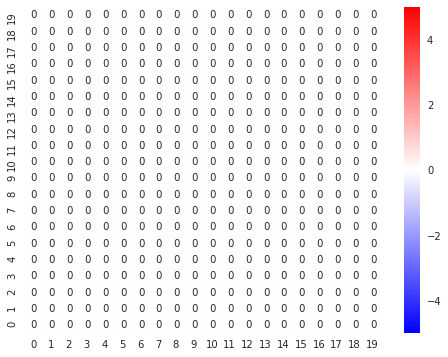

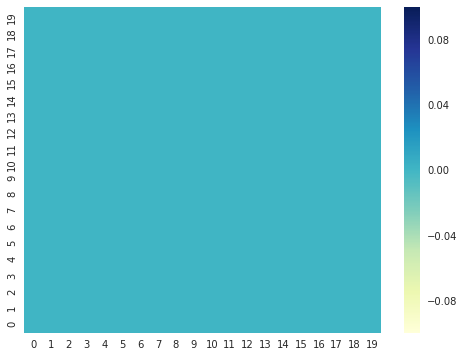

In [3]:
rcParams['figure.figsize'] = 8, 6

def plot_policy(ps):
    ax = sns.heatmap(ps, annot=True, fmt="2.0f", cmap="bwr", vmin=-5, vmax=5)
    ax.invert_yaxis()
    plt.show()

def plot_values(vs):
    """Plot value function"""
    ax = sns.heatmap(vs, cmap="YlGnBu")
    ax.invert_yaxis()
    plt.show()

# No more then 20 cars
MAX_CARS = 20
# State is #cars at the end of day for each location
state = np.zeros((MAX_CARS, MAX_CARS))
# Random variables
request_lambda_1 = 3
request_lambda_2 = 4
return_lambda_1 = 3
return_lambda_2 = 2
# Value function
values = np.zeros((MAX_CARS, MAX_CARS))
# Policy (max of 5 cars can be moved) #cars moved from location1 to location2
policy = np.zeros((MAX_CARS, MAX_CARS))
# Discount rate
gamma = 0.9

plot_policy(policy)
plot_values(values)

# Value Iteraction

Description with Exercise 4.9